<a href="https://colab.research.google.com/github/Molzard/PCVK-Ganjil-2025/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<p align="center">D. Tugas Praktikum</p>


---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv_imshow
import matplotlib.pyplot as plt

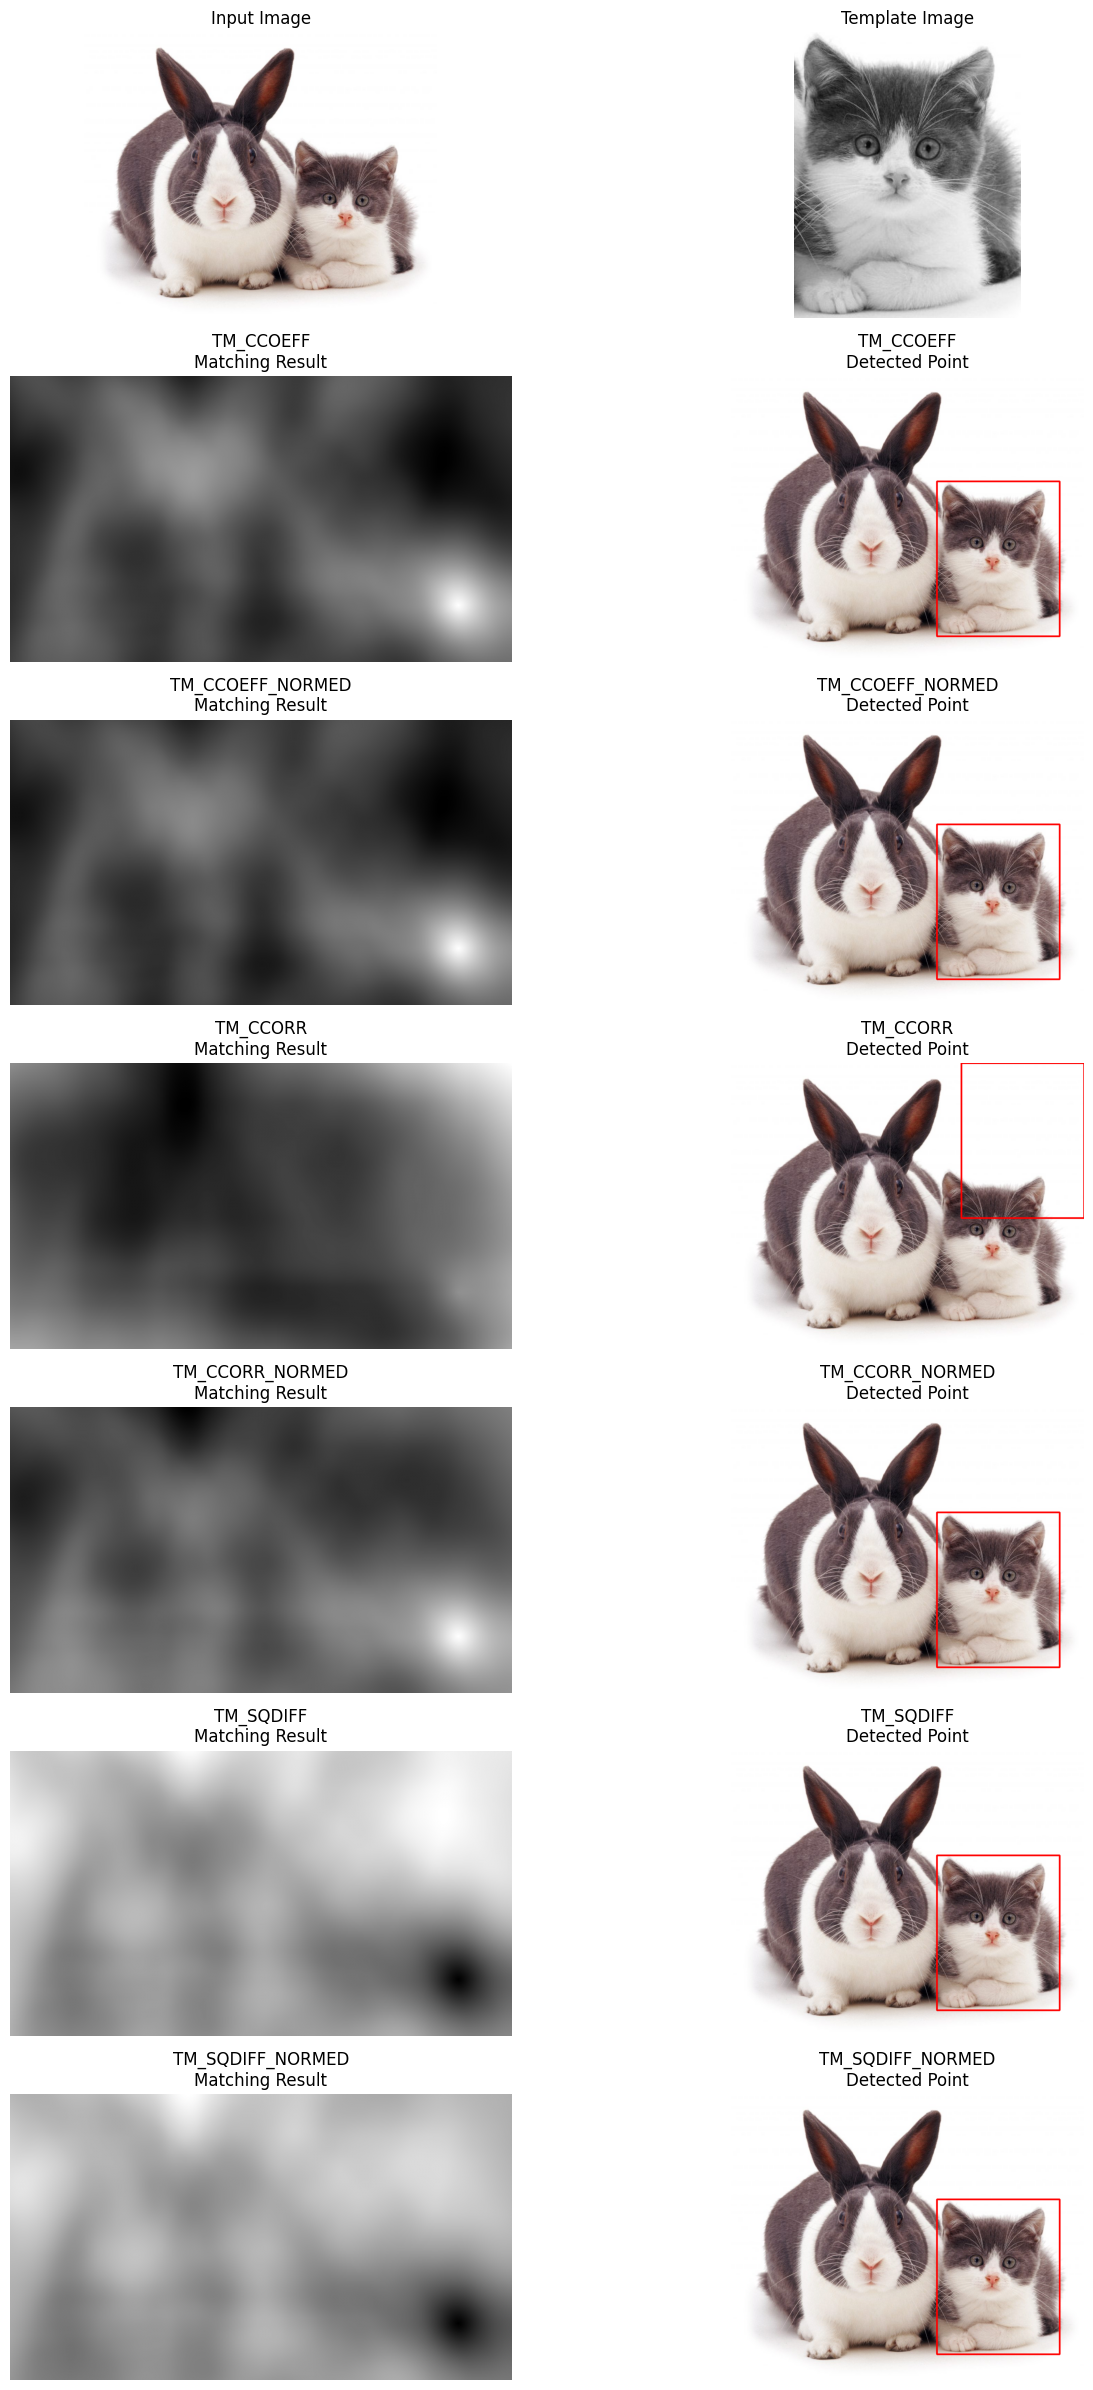

In [13]:
# Gambar utama grayscale untuk matching
img_gray = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/cats_and_bunnies.jpg', 0)
# Template kucing grayscale
template = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/cat2_templatejpg.jpg', 0)

# Dapatkan ukuran template
w, h = template.shape[::-1]

# Gambar berwarna untuk menggambar kotak hasil deteksi
img_color = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/cats_and_bunnies.jpg')

# Semua metode
methods = [
    ('TM_CCOEFF', cv2.TM_CCOEFF),
    ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED),
    ('TM_CCORR', cv2.TM_CCORR),
    ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
    ('TM_SQDIFF', cv2.TM_SQDIFF),
    ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED)
]

# Plot setup
plt.figure(figsize=(15, 24))
plot_index = 1

# Input image
plt.subplot(7, 2, plot_index)
plt.title("Input Image")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis("off")
plot_index += 1

# Template image
plt.subplot(7, 2, plot_index)
plt.title("Template Image")
plt.imshow(template, cmap='gray')
plt.axis("off")
plot_index += 1

# Matching untuk setiap metode
for name, method in methods:
    img_display = img_color.copy()

    # Template matching
    result = cv2.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Untuk metode SQDIFF, lokasi terbaik adalah min_loc
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_display, top_left, bottom_right, (0, 0, 255), 3)

    # Hasil matching
    plt.subplot(7, 2, plot_index)
    plt.title(f"{name}\nMatching Result")
    plt.imshow(result, cmap='gray')
    plt.axis("off")
    plot_index += 1

    # Hasil deteksi
    plt.subplot(7, 2, plot_index)
    plt.title(f"{name}\nDetected Point")
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plot_index += 1

plt.tight_layout()
plt.show()

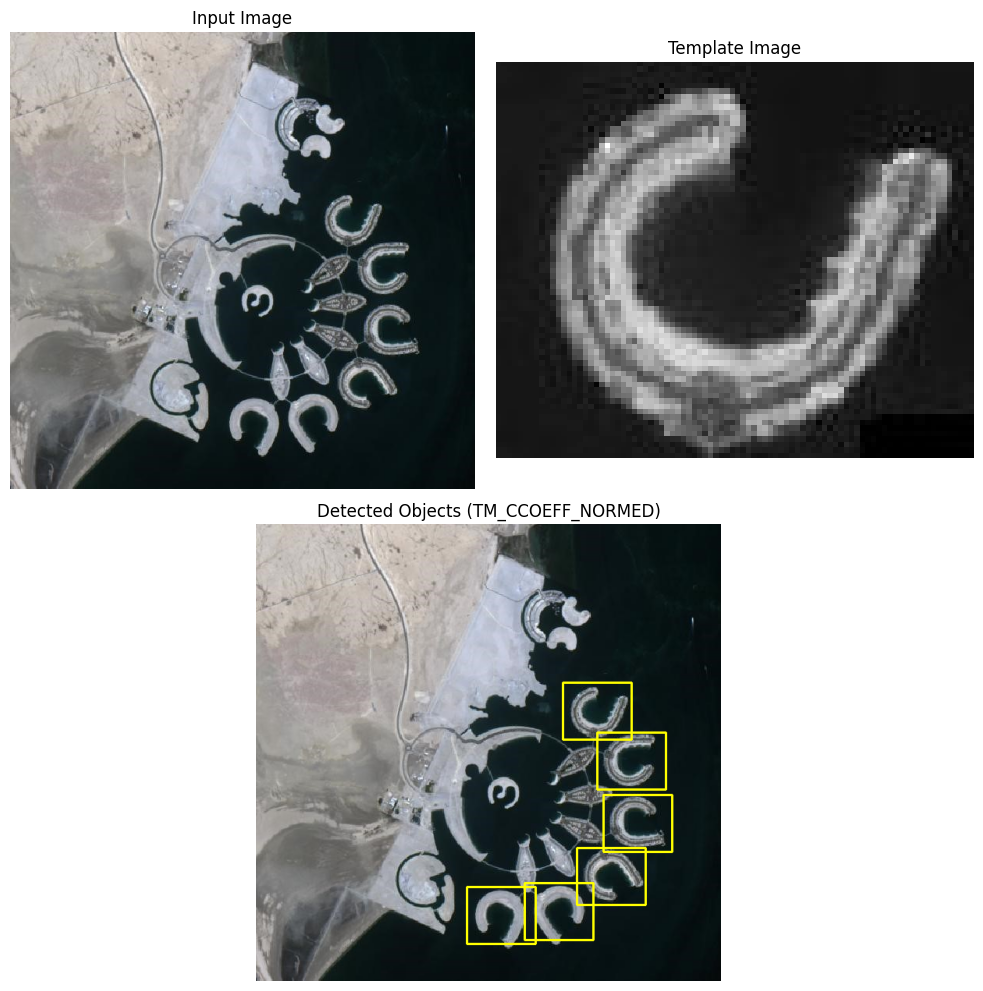

In [19]:
# Gambar
img_gray = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/bahrain.jpg', 0)
template = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/bahrain-template.jpg', 0)
img_color = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/bahrain.jpg')

# Dapatkan ukuran template
w, h = template.shape[::-1]

# Template Matching (menggunakan TM_CCOEFF_NORMED)
result = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Threshold untuk deteksi banyak objek
threshold = 0.45
loc = np.where(result >= threshold)

# Simpan semua kotak deteksi sementara
rectangles = []
for pt in zip(*loc[::-1]):  # swap x dan y
    rectangles.append([int(pt[0]), int(pt[1]), int(w), int(h)])
    rectangles.append([int(pt[0]), int(pt[1]), int(w), int(h)])  # duplikasi diperlukan untuk groupRectangles

# Non-Maximum Suppression untuk menghindari tumpang tindih
rectangles, weights = cv2.groupRectangles(rectangles, groupThreshold=1, eps=0.5)

# Gambar kotak deteksi
for (x, y, w, h) in rectangles:
    cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 255), 2)  # kuning

# Hasil
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Input Image")
plt.imshow(cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/bahrain.jpg'), cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Template Image")
plt.imshow(template, cmap='gray')
plt.axis("off")

plt.subplot(2, 1, 2)
plt.title("Detected Objects (TM_CCOEFF_NORMED)")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

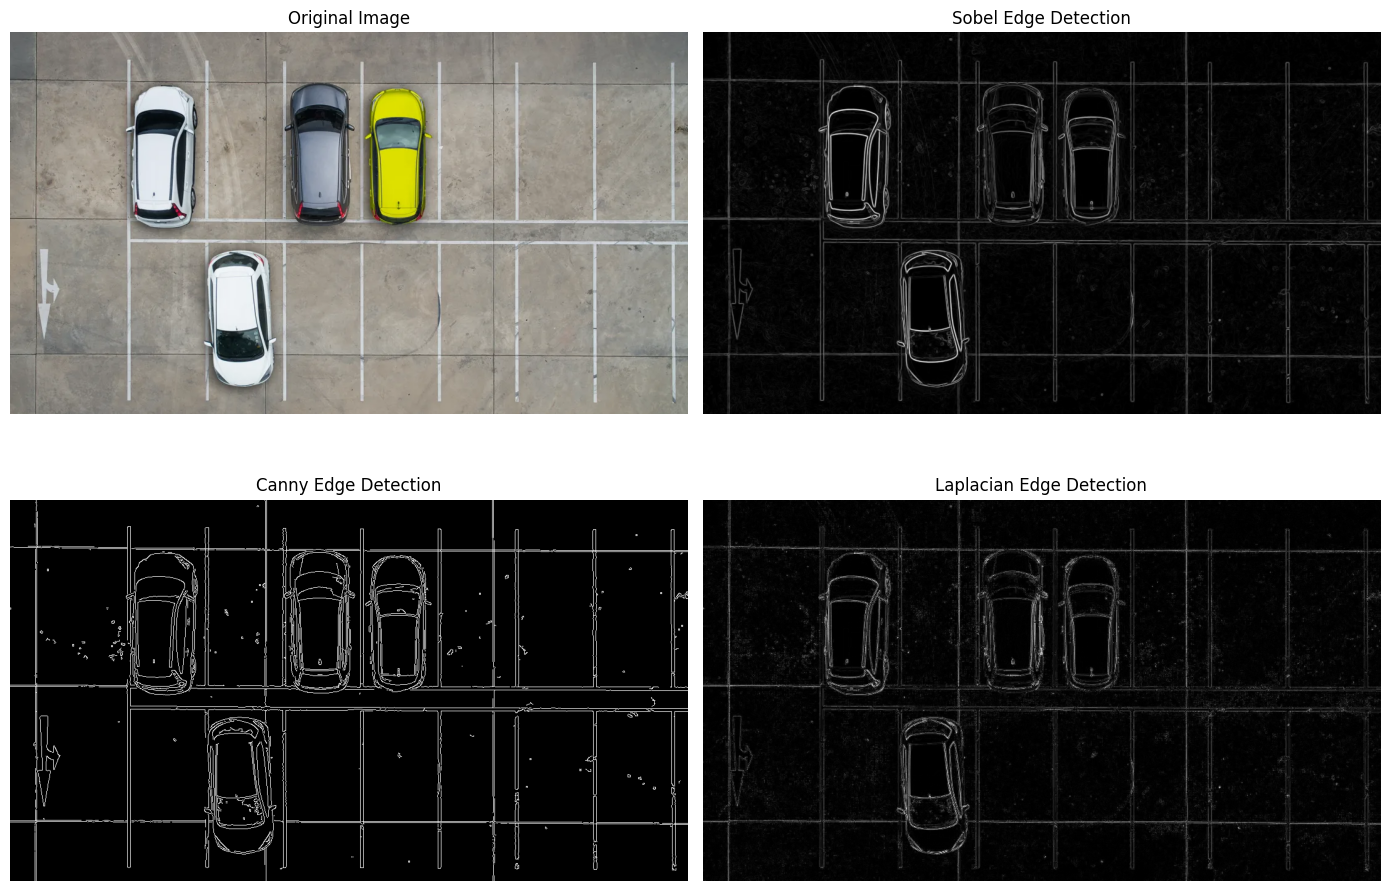

In [21]:
img_color = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/car-park.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  # arah X
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)  # arah Y
sobel_combined = cv2.magnitude(sobelx, sobely)  # magnitude gabungan

# Canny Edge Detection
# parameter 100 dan 200 bisa disesuaikan untuk sensitivitas
canny_edges = cv2.Canny(img_gray, 100, 200)

# Laplacian Edge Detection
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # ubah ke 8-bit agar bisa ditampilkan

# Plot
plt.figure(figsize=(14, 10))

# Input image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Sobel
plt.subplot(2, 2, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_combined, cmap='gray')
plt.axis("off")

# Canny
plt.subplot(2, 2, 3)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')
plt.axis("off")

# Laplacian
plt.subplot(2, 2, 4)
plt.title("Laplacian Edge Detection")
plt.imshow(laplacian, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

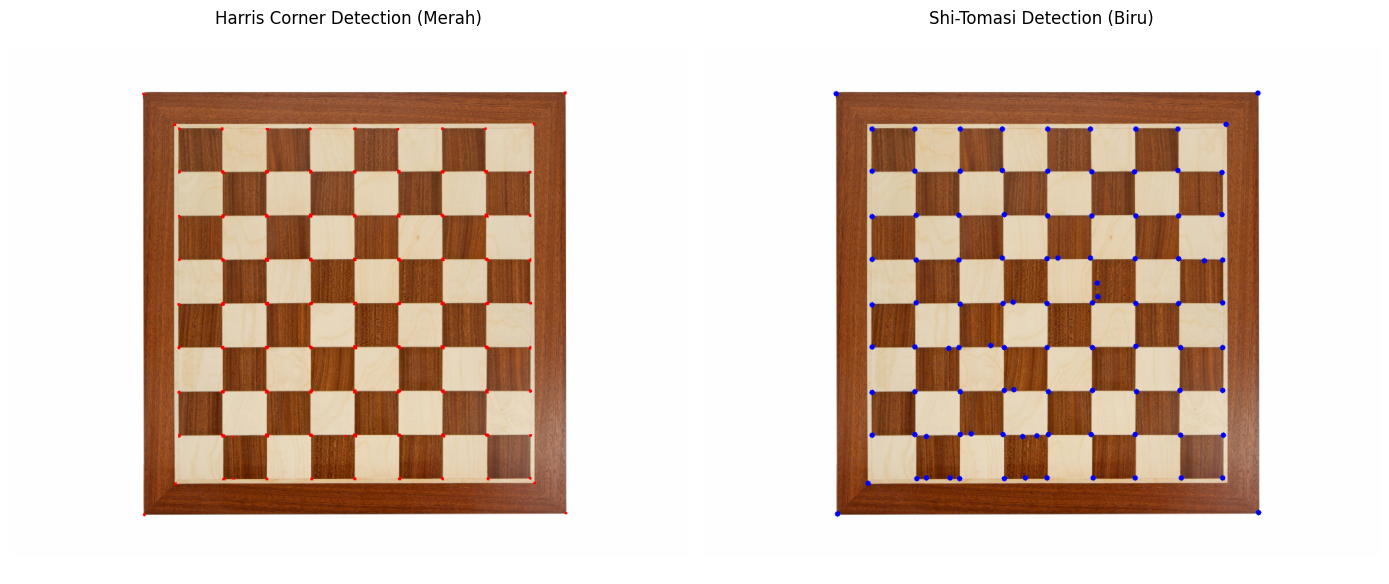

In [26]:
img_color = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/chess-board.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_float = np.float32(img_gray)
harris_dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Normalisasi hasil untuk thresholding
harris_dst = cv2.dilate(harris_dst, None)
harris_img = img_color.copy()
harris_img[harris_dst > 0.01 * harris_dst.max()] = [0, 0, 255]  # merah

# Shi-Tomasi Corner Detection
shi_img = img_color.copy()
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)

for i in corners:
    x, y = i.ravel()
    cv2.circle(shi_img, (x, y), 4, (255, 0, 0), -1)

# Hasil Harris dan Shi-Tomasi
combined = img_color.copy()
combined[harris_dst > 0.01 * harris_dst.max()] = [0, 0, 255]
for i in corners:
    x, y = i.ravel()
    cv2.circle(combined, (x, y), 4, (255, 0, 0), -1)

# Hasil
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.title("Harris Corner Detection (Merah)")
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Shi-Tomasi Detection (Biru)")
plt.imshow(cv2.cvtColor(shi_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


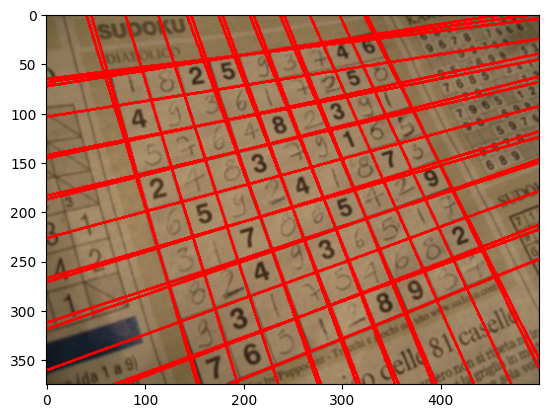

In [29]:
img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/sudoku.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Penerapan edge detection
edges = cv2.Canny(gray, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv2.erode(edges, kernel, iterations=1)

# Garis Hough
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

if lines is None or not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    # Gambar garis dari gambar input
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Tampilankan gambar dengan garis
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
plt.show()


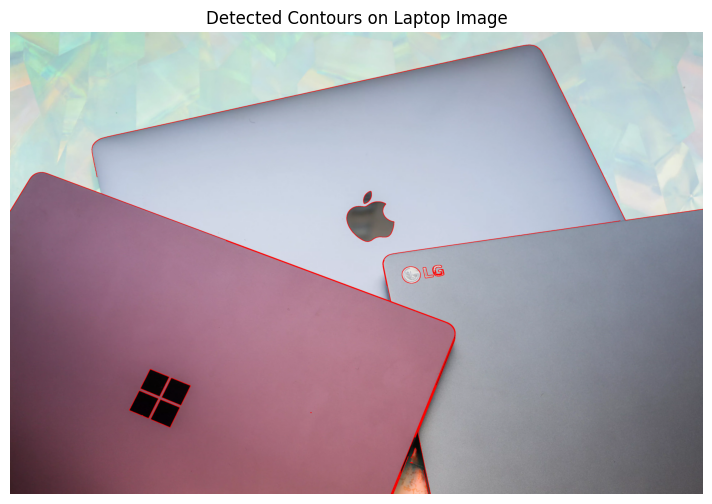

Jumlah kontur terdeteksi: 28


In [35]:
img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Object Detection/laptop.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)

# Gunakan Canny untuk mendeteksi tepi dengan halus
edges = cv2.Canny(blur, 50, 150)

# Temukan kontur berdasarkan hasil Canny
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Salin gambar asli untuk menggambar kontur
contour_img = img.copy()

# Gambar kontur dengan warna merah tipis
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 2)

plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Contours on Laptop Image")
plt.axis('off')
plt.show()

print("Jumlah kontur terdeteksi:", len(contours))


---


<p align="center">D2. Praktikum Feature Matching dan Face Detection</p>


---



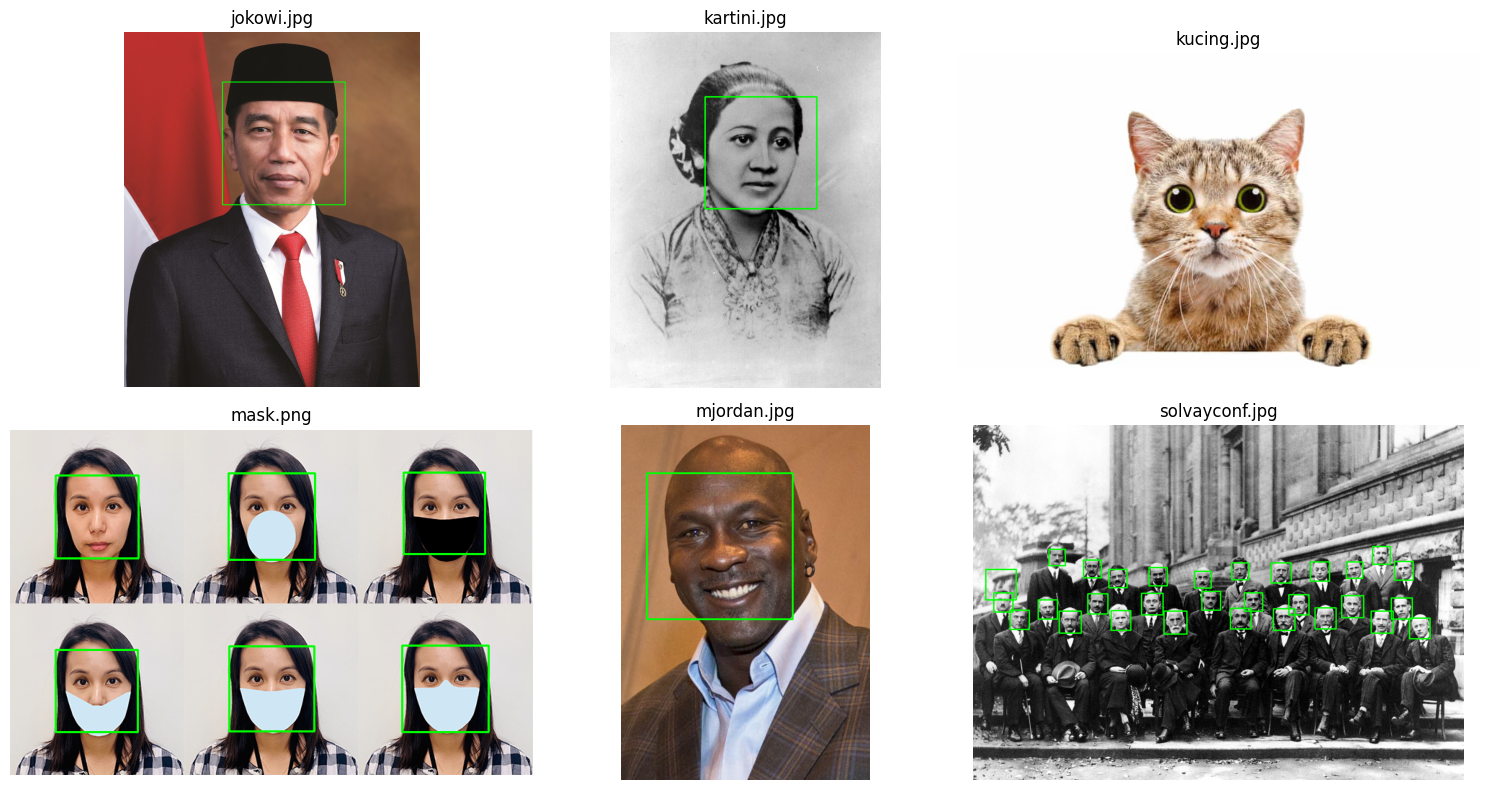

In [36]:
import os

# Path folder & file target
folder_path = '/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/facedet'
selected_files = [
    'jokowi.jpg',
    'kartini.jpg',
    'kucing.jpg',
    'mask.png',
    'mjordan.jpg',
    'solvayconf.jpg'
]

# File bawaan OpenCV
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml'
cascade_wajah = cv2.CascadeClassifier(cascade_path)

# Siapkan figure grid 2x3
plt.figure(figsize=(15, 8))

for i, file_name in enumerate(selected_files):
    file_path = os.path.join(folder_path, file_name)
    img = cv2.imread(file_path)

    if img is None:
        print(f"Gagal membaca {file_name}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah
    faces = cascade_wajah.detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=4, minSize=(30, 30)
    )

    # Gambar kotak hijau di sekitar wajah
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Konversi ke RGB untuk tampil di matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tampilkan di subplot
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(file_name)
    plt.axis('off')

# Atur tata letak agar rapi
plt.tight_layout()
plt.show()


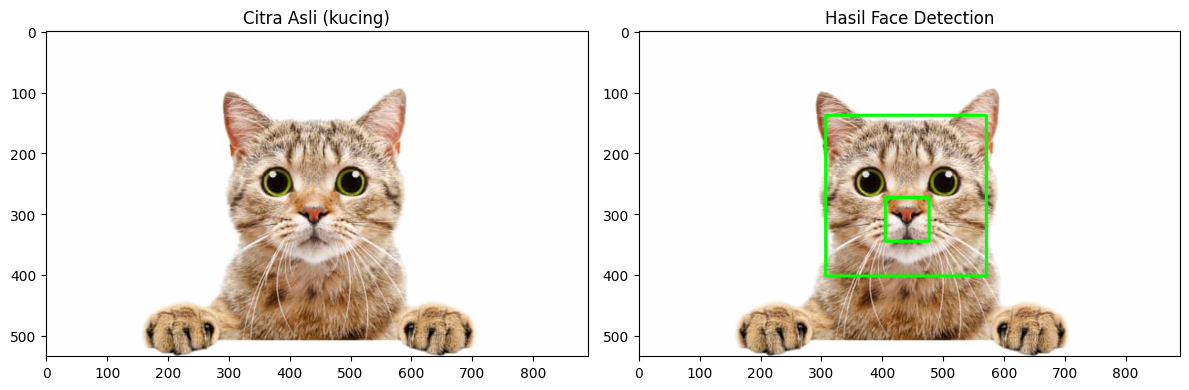

In [37]:

cascade_path = '/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/haarcascades/haarcascade_frontalcatface_extended.xml'
cascade_wajah = cv2.CascadeClassifier(cascade_path)

# Tambahkan pengecekan apakah cascade classifier berhasil dimuat
if cascade_wajah.empty():
    print(f"Gagal memuat Haar Cascade: {cascade_path}. Pastikan file ada dan tidak rusak.")
else:
    # Baca gambar
    kucing = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/facedet/kucing.jpg')

    # Ubah dari BGR ke RGB untuk manusia
    kucing_rgb = cv2.cvtColor(kucing, cv2.COLOR_BGR2RGB)

    # Deteksi wajah
    face_detect = kucing.copy()
    roi_wajah = cascade_wajah.detectMultiScale(face_detect, scaleFactor=1.12, minNeighbors=5, minSize=(50, 50))

    for (x, y, w, h) in roi_wajah:
        cv2.rectangle(face_detect, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Konversi hasil deteksi ke RGB juga
    face_detect_rgb = cv2.cvtColor(face_detect, cv2.COLOR_BGR2RGB)

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(kucing_rgb)
    plt.title("Citra Asli (kucing)")

    plt.subplot(1, 2, 2)
    plt.imshow(face_detect_rgb)
    plt.title("Hasil Face Detection")

    plt.tight_layout()
    plt.show()

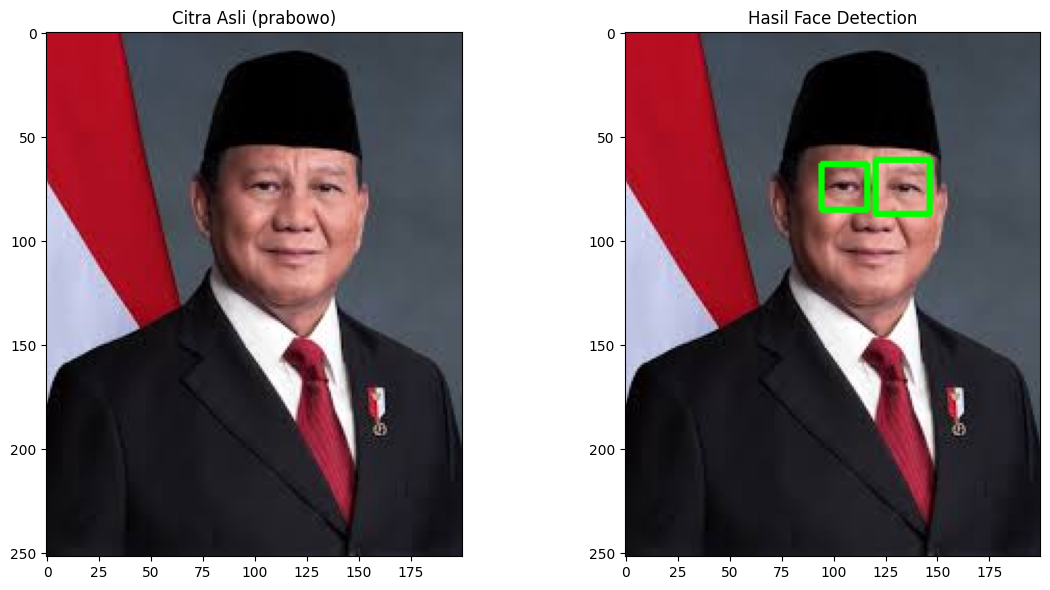

In [38]:
# Load model deteksi wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/haarcascades/haarcascade_eye.xml')

# Baca gambar
prabowo = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/prabowo.jpg')

# Ubah dari BGR ke RGB untuk manusia
prabowo_rgb = cv2.cvtColor(prabowo, cv2.COLOR_BGR2RGB)

# Deteksi wajah
face_detect = prabowo.copy()
roi_wajah = cascade_wajah.detectMultiScale(face_detect, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))

for (x, y, w, h) in roi_wajah:
    cv2.rectangle(face_detect, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Konversi hasil deteksi ke RGB juga
face_detect_rgb = cv2.cvtColor(face_detect, cv2.COLOR_BGR2RGB)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(prabowo_rgb)
plt.title("Citra Asli (prabowo)")

plt.subplot(1, 2, 2)
plt.imshow(face_detect_rgb)
plt.title("Hasil Face Detection")

plt.tight_layout()
plt.show()

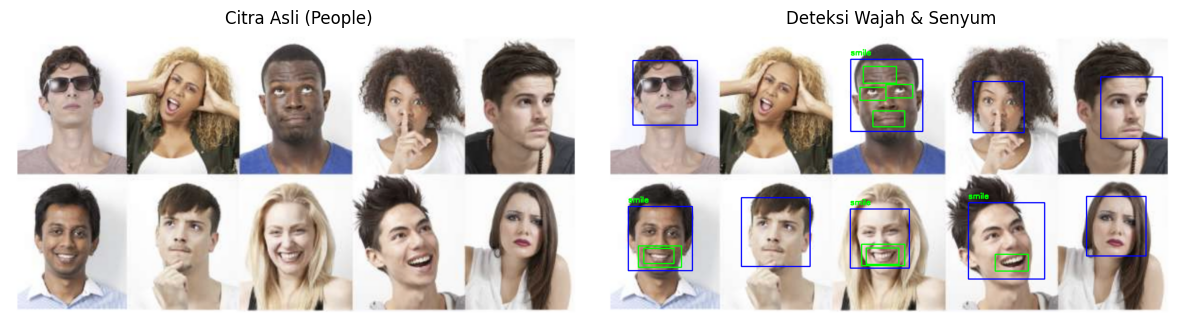

In [42]:
# Load model Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Load gambar
img = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/People.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
# faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(80, 80))
faces = face_cascade.detectMultiScale(gray)

# Salin gambar untuk anotasi
result = img.copy()

# Untuk setiap wajah, deteksi senyumnya
for (x, y, w, h) in faces:
    # Gambar kotak wajah
    cv2.rectangle(result, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Ambil ROI wajah
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = result[y:y + h, x:x + w]

    # Deteksi senyum di dalam area wajah
    smiles = smile_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.3,
        minNeighbors=8,
    )

    # Gambar kotak di area senyum
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_gray, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 2)

    if len(smiles) > 0:
        cv2.putText(result, "smile", (x, y - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        for (sx, sy, sw, sh) in smiles:
          cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 2)


# Konversi ke RGB untuk ditampilkan
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Citra Asli (People)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("Deteksi Wajah & Senyum")
plt.axis('off')

plt.tight_layout()
plt.show()


In [43]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import base64
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = base64.b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array)
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(base64.b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
label_html = 'Capturing...'
bbox = ''

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Konversi JS response ke OpenCV Image
    img = js_to_image(js_reply["img"])

    # Siapkan overlay transparan untuk bounding box
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # Konversi ke grayscale untuk deteksi wajah
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Loop setiap wajah
    for (x, y, w, h) in faces:
        # Buat bounding box biru
        bbox_array = cv2.rectangle(bbox_array, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # AMBIL ROI (Region of Interest) WAJAH
        face_roi = img[y:y + h, x:x + w]

    # Buat alpha channel untuk overlay bounding box
    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255

    # Konversi bounding box overlay ke base64 untuk ditampilkan di video
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

MessageError: NotAllowedError: Permission denied

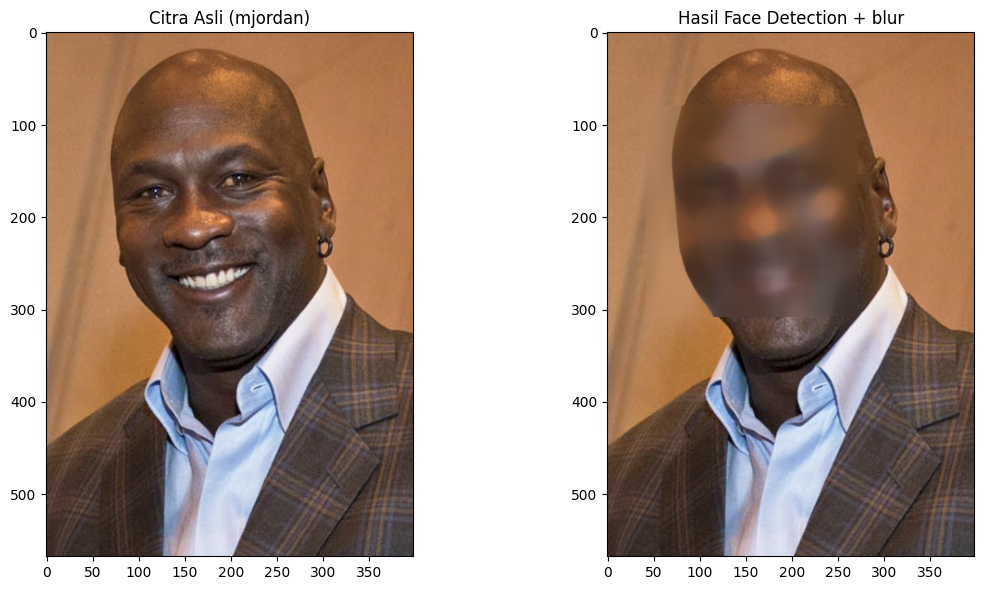

In [45]:
# Load model deteksi wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/haarcascades/haarcascade_frontalface_alt.xml')

# Baca gambar
jordan = cv2.imread('/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/facedet/mjordan.jpg')

# Ubah dari BGR ke RGB untuk manusia
jordan_rgb = cv2.cvtColor(jordan, cv2.COLOR_BGR2RGB)

# Deteksi wajah
face_detect = jordan.copy()
roi_wajah = cascade_wajah.detectMultiScale(face_detect, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))

for (x, y, w, h) in roi_wajah:
    # cv.rectangle(face_detect, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi = face_detect[y:y+h, x:x+w]
     # Terapkan median blur — nilai ksize harus ganjil
    blurred = cv2.medianBlur(roi, 35)

    # Tempelkan hasil blur ke gambar utama
    face_detect[y:y+h, x:x+w] = blurred

# Konversi hasil deteksi ke RGB juga ===
face_detect_rgb = cv2.cvtColor(face_detect, cv2.COLOR_BGR2RGB)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(jordan_rgb)
plt.title("Citra Asli (mjordan)")

plt.subplot(1, 2, 2)
plt.imshow(face_detect_rgb)
plt.title("Hasil Face Detection + blur")

plt.tight_layout()
plt.show()

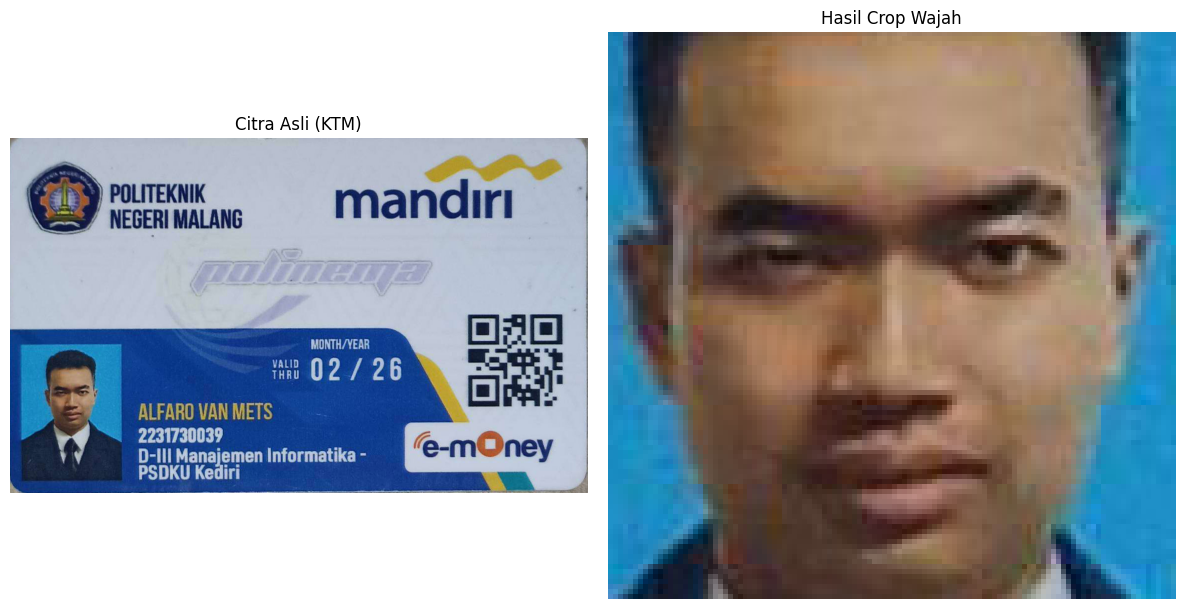

In [46]:

# Load model deteksi wajah
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# Baca gambar
img_path = '/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/KTM Alfaro.jpg'
img = cv2.imread(img_path)

# Ubah ke RGB untuk tampil di matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ubah ke grayscale untuk deteksi wajah
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = cascade_wajah.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ambil ROI (area wajah pertama yang terdeteksi)
if len(faces) > 0:
    x, y, w, h = faces[0]  # Ambil wajah pertama yang ditemukan
    cropped_face = img[y:y+h, x:x+w]
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
else:
    print("Tidak ada wajah yang terdeteksi!")
    cropped_face_rgb = None

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Citra Asli (KTM)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_face_rgb)
plt.title("Hasil Crop Wajah")
plt.axis('off')

plt.tight_layout()
plt.show()

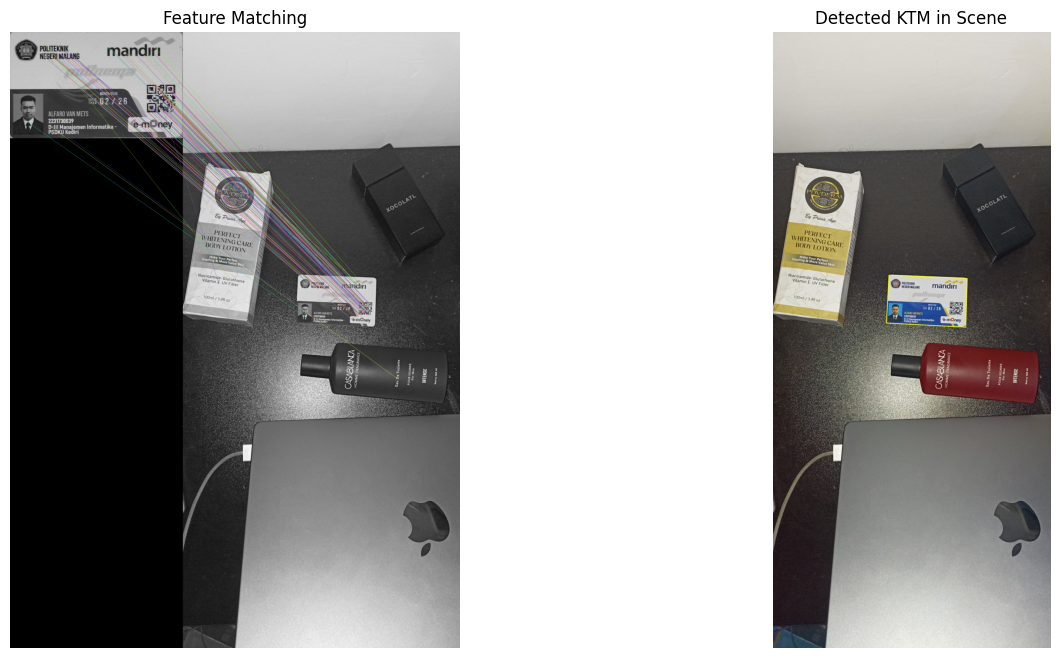

In [67]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path gambar
template_path = '/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week5/KTM Alfaro.jpg'
scene_path = '/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Banyak Benda.jpeg'

# Baca gambar
img1 = cv2.imread(template_path, 0)
img2 = cv2.imread(scene_path, 0)

# Inisialisasi ORB detector
orb = cv2.ORB_create(nfeatures=2000)

# Deteksi keypoints dan descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# BFMatcher untuk mencocokkan fitur
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)

# Filter menggunakan ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Visualisasi hasil matching
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good, None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Jika cukup banyak matches, hitung homografi untuk deteksi posisi KTM
if len(good) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    img2_color = cv2.imread(scene_path)
    img_detected = cv2.polylines(img2_color, [np.int32(dst)], True, (0, 255, 255), 4, cv2.LINE_AA)
else:
    img_detected = cv2.imread(scene_path)
    print("KTM tidak terdeteksi dengan cukup fitur.")

# Tampilkan hasil
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Feature Matching")
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Detected KTM in Scene")
plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

---


<p align="center">Tambahan Tugas Praktikum</p>


---



In [54]:
# Data Preparation

import os
import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori dataset
DATADIR = "/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Dataset/"
dirs = []
training_data = []
width, height = 100, 100

# Ambil nama folder (setiap folder = 1 kelas)
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua gambar pada setiap folder
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)
    for img in tqdm.tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

# Acak urutan data
random.shuffle(training_data)

X = []
Y = []

# Pisahkan fitur dan label
for feature, label in training_data:
    X.append(feature)
    Y.append(label)

# Ubah ke numpy array dan reshape agar cocok untuk CNN
X = np.array(X).reshape(-1, width, height, 1)
Y = np.array(Y)

# Simpan ke file pickle
pickle.dump(X, open("X.pickle", "wb"))
pickle.dump(Y, open("Y.pickle", "wb"))

print("Data preparation selesai!")
print("Total data:", len(X))

100%|██████████| 1/1 [00:00<00:00, 129.94it/s]

Data preparation selesai!
Total data: 7


In [55]:
import pickle

X = pickle.load(open("X.pickle", "rb"))
Y = pickle.load(open("Y.pickle", "rb"))

print("Jumlah data X:", len(X))
print("Jumlah label Y:", len(Y))

Jumlah data X: 7
Jumlah label Y: 7


In [57]:
# Training Data

import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model, load_model
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

# Normalisasi dan ubah label menjadi one-hot
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)

flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer disesuaikan dengan jumlah kelas (7)
outputs = Dense(7, activation='softmax')(fc_layer)

# Kompilasi model
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Proses training
model.fit(X, Y, epochs=20, verbose=1)

# Simpan model
model.save('anpr.keras')

print("Training selesai dan model berhasil disimpan!")

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1429 - loss: 1.9469
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.1429 - loss: 1.9326
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.1429 - loss: 1.9169
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.2857 - loss: 1.9006
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.2857 - loss: 1.8817
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.4286 - loss: 1.8614
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7143 - loss: 1.8370
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.8571 - loss: 1.8079
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.8571 - loss: 1.7774
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.8571 - loss: 1.7438
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.8571 - loss: 1.7055
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8571 - loss:

In [66]:
# Testing Data

import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Dataset/"
data_dir_testing = "/content/drive/MyDrive/Semester 7/Pengolahan Citra dan Visi Komputer/Week11/Dataset_Testing/"
dirs = []
width, height = 100, 100

model = tf.keras.models.load_model("anpr.keras")

for char_name in sorted(os.listdir(data_dir_training)):
    dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
    temp = ""
    for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
      img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (width, height))
      new_array = np.array(new_array).reshape(-1, width, height, 1)
      new_array = new_array / 255.0
      prediction = model.predict(new_array)
      predicted_class = dirs[np.argmax(prediction[0])]
      print(f"{char_img} -> {predicted_class}")
      temp += predicted_class
    print("folder name: {} no: {}".format(car, temp))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
0.jpg -> 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1.jpg -> 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2.jpg -> 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
3.jpg -> 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6.jpg -> 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
7.jpg -> 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
9.jpg -> 9
folder name: KTM1 no: 0123679
